# <center> Wrangle and Analyze Data (WeRateDogs) <br>
<center> by Patrick bloomingdale <center> <br>
<center> This project is part of Udacity's Data Analyst Nanodegree <center>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import csv
import requests
from tweepy import OAuthHandler
import json
import matplotlib.pyplot as plt 
% matplotlib inline 
import seaborn as sns 
from collections import Counter 
from wordcloud import WordCloud, STOPWORDS 

# display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 
pd.set_option('display.max_colwidth', 500)

## Gathering Data
Gather data from the following three sources:
1. **`twitter-archive-enhanced.csv`**: file provided by Udacity and downloaded manually <br><br>
2. **`image-predictions.tsv`**: file hosted on Udacity's server and downloaded programmatically using `Requests` library <br><br>
3. **`tweet_json.txt`**: queried the Twitter API for tweets in the Twitter archive using `Tweepy` library and saved JSON in a text file

### 1. Download Manually

In [2]:
# read in twitter_archive_enhanced.csv 
df_arch = pd.read_csv("twitter-archive-enhanced.csv")
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### 2. Download Programmatically

In [3]:
# read in image-predictions.tsv by downloading programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', "wb") as file: file.write(response.content)

df_images = pd.read_table('image-predictions.tsv', sep='\t')

In [4]:
# create a csv from image-predictions.tsv
tsv_file = 'image-predictions.tsv'
csv_table = pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('df_images.csv', index = False)

In [5]:
# view dataset
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Query the Twitter API 

In [6]:
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_arch.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()

# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [7]:
# read in the tweet_json.txt json
# dictionary to build file and convert to DataFrame
df_tweet = []
with open('tweet_json.txt', encoding='utf-8') as file:
    for i in file:
        tweet = json.loads(i)
        # append to dictionary
        df_tweet.append(tweet)

# read txt file line by line into a pandas DataFrame
df_tweet = pd.DataFrame(df_tweet, columns = list(df_tweet[0].keys())) 

In [8]:
# create DataFrame with columns going to use:
# id, retweet_count, favorite_count
df_tweet = df_tweet[['created_at', 'id', 'retweet_count', 'favorite_count']]
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
created_at        2354 non-null object
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [9]:
# save to tweet_json.csv
df_tweet.to_csv('tweet_json.csv')

## Assessing Data

### Visual and Programmatic Assessment

### df_arch column
 - **`tweet_id`**: Id of tweet
 - **`in_reply_to_status_id`**: Tweet is a reply and will contain the original tweet id
 - **`in_reply_to_user_id`**: Tweet is a reply and will contain the original tweet author id
 - **`timestamp`**: Date and time of the post
 - **`source`**: How the submission was posted (Twitter for iPhone, Twitter Web Client, Make a Scene, Tweetdeck)
 - **`text`**: The text the twitter user posted 
 - **`expanded_urls`**: Web address of post
 - **`rating_numerator`**: Number of stars dog received
 - **`rating_denominator`**: Number of stars dog could have received
 - **`name`**: name of the dog
 - **`doggo`**: a dog of medium to large size
 - **`floofer`**: a very fluffy dog
 - **`pupper`**: a dog of smaller size
 - **`puppo`**: a puppy

In [10]:
# display the variables and first five rows
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [11]:
#datatypes of columns and missing values
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
#number of non-null unique values for features in each dataset
df_arch.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [13]:
# number of duplicates in dataset
sum(df_arch.duplicated())

0

In [14]:
# counts for name column
df_arch.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
an             7
Daisy          7
Toby           7
Buddy          7
Jax            6
Jack           6
Stanley        6
Milo           6
Dave           6
Koda           6
Bella          6
Scout          6
Oscar          6
Leo            6
Rusty          6
Alfie          5
            ... 
Edmund         1
Hazel          1
Jersey         1
Chuck          1
Dale           1
Trevith        1
Jangle         1
Gin            1
Humphrey       1
Brandy         1
Charleson      1
Grizz          1
Strider        1
Howie          1
Rodman         1
Brian          1
Pavlov         1
Cilantro       1
Izzy           1
Brockly        1
General        1
Socks          1
Tyrus          1
Gerbald        1
Amy            1
Aja            1
Taz            1
Mollie        

In [15]:
# look at some values in the text column that have decimals
print(df_arch[df_arch.tweet_id == 680494726643068929]['text'])
print(df_arch[df_arch.tweet_id == 883482846933004288]['text'])
print(df_arch[df_arch.tweet_id == 786709082849828864]['text'])
print(df_arch[df_arch.tweet_id == 778027034220126208]['text'])
print(df_arch[df_arch.tweet_id == 680494726643068929]['text'])

1712    Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
Name: text, dtype: object
45    This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
Name: text, dtype: object
695    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Name: text, dtype: object
763    This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Name: text, dtype: object
1712    Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
Name: text, dtype: object


### df_images column
 - **`tweet_id`:**  last part of the tweet URL after "status/" 
 - **`jpg_url`**: Web address of dog image
 - **`img_num`**: a column containing the number 1
 - **`p1*`**: Algorithm's number one (1) prediction for the image in the tweet
 - **`p1_conf`**: How confident the algorithm is in its number one (1) prediction
 - **`p1_dog`**: Whether or not number one (1) prediction is a dog
 - **`p2*`**: Algorithm's second most likely prediction
 - **`p2_conf`**: How confident the algorithm is in its second most likely prediction
 - **`p2_dog`**: Whether or not second most likely prediction is a dog
 - **`p3*`**: Algorithm's third most likely prediction
 - **`p3_conf`**: How confident the algorithm is in its third most likely prediction
 - **`p3_dog`**: Whether or not third most likely prediction is a dog 
 
 *`p1, p2, p3`
  - Dogs: Welsh_springer_spaniel, German_shepherd, miniature_pinscher, etc. 
  - Non-Dogs: box_turtle, shopping_cart, hen, desktop_computer, guinea_pig, etc. 

In [16]:
# display the variables and first five rows
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
#datatypes of columns and missing values
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
# counts for p1 column
df_images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [19]:
df_images[(df_images["p1_dog"] == True)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True


In [20]:
# check accuracy of image prediciton
df_images[(df_images["p1_dog"] == False) &
         (df_images["p2_dog"] == False) &
         (df_images["p3_dog"] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


### df_tweet columns
 - **`created_at`:** date the tweet was created
 - **`id`:** Id of tweet
 - **`retweet_count`**: number of times the post was retweeted
 - **`favorite_count`**: number of times the post was favorited

In [21]:
# display the variables and first five rows
df_tweet.head()

,created_at,id,retweet_count,favorite_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,8853,39467
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,6514,33819
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,4328,25461
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,8964,42908
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,9774,41048


In [22]:
#datatypes of columns and missing values
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
created_at        2354 non-null object
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [23]:
df_tweet_id = df_tweet[(df_tweet["id"] == 892420643555336193)] 
df_tweet_id

,created_at,id,retweet_count,favorite_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,8853,39467


In [24]:
df_arch_id = df_arch[(df_arch["tweet_id"] == 892420643555336193)]
df_arch_id

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [25]:
df_images_id = df_images[(df_images["tweet_id"] == 892420643555336193)] 
df_images_id

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


### Data Quality Issues

#### *`df_arch`* table
1. **`name`**: has values of "None" instead of "NaN" and names that are not the name of the dog, such as: <br>
"a", "actually", "an", "None", "not", "old", "Officially", "the", "this".
2. **`doggo`**, **`floofer`**, **`pupper`**, and **`puppo`**: have values of "None" instead of "NaN" 
3. Some of the tweets in the dataset are retweets
4. **`rating_numerator`**: When a numerator has a decimal it uses the decimal as the number. <br>
For example, `tweet_id` (778027034220126208):
 - has a score of 11.27/10 listed in the `text` column. <br>
 - the `rating_numerator` is 27 and `rating_denominator` is 10.
5. **`timestamp`**: column object not date
6. **`rating_numerator`**: column interger not float
7. **`created_at`**: column object not date

#### *`df_images`* table
8. **`p1`**, **`p2`**, and **`p3`** contain images that are not dogs

#### *`df_tweet`*  table
9. **`created_at`**: column object not date

#### *`df_arch`* table and *`df_images`* table
10. `df_arch_clean`  and `df_images_clean` tables contain columns that are not needed

### Tidiness
1. Column headers (variables) are values, not variable names <br>
**`doggo`**, **`floofer`**, **`pupper`**, and **`puppo`**: These columns are the different dog stages (values) and should be stored in a single column.
2. Some of the same variables are named differently on the different DataFrames** <br>
 -  **`tweet_id`** and **`id`** are the same variable <br>
 -  **`text`** and **`full_text`** are the same variable <br>
3. Combine the three tables (df_arch, df_images, df_tweet) into one dataframe

## Cleaning Data

In [26]:
# copy datasets to be cleaned
df_arch_clean = df_arch.copy()
df_images_clean = df_images.copy()
df_tweet_clean = df_tweet.copy()

### Missing Data

**Quality 1 & 2** <br>
`df_arch_clean` table columns `name`, `doggo`, `floofer`, `pupper`, and `puppo` have "None" values

**Define**<br> 
Change all values of "None" to "NaN"

**Code**<br> 

In [27]:
#replace values of "None" with "NaN"
df_arch_clean['name'] = df_arch_clean['name'].replace('None', np.NaN)
df_arch_clean['doggo'] = df_arch_clean['doggo'].replace('None', np.NaN)
df_arch_clean['floofer'] = df_arch_clean['floofer'].replace('None', np.NaN)
df_arch_clean['pupper'] = df_arch_clean['pupper'].replace('None', np.NaN)
df_arch_clean['puppo'] = df_arch_clean['puppo'].replace('None', np.NaN)

**Test**

In [28]:
#check to see if None replaced with NaN
print("name:")
print(sum(df_arch_clean.name == 'None'))
print("doggo:")
print(sum(df_arch_clean.doggo == 'None'))
print("floofer:")
print(sum(df_arch_clean.floofer == 'None'))
print("pupper:")
print(sum(df_arch_clean.pupper == 'None'))
print("puppo:")
print(sum(df_arch_clean.puppo == 'None'))

name:
0
doggo:
0
floofer:
0
pupper:
0
puppo:
0


**Quality 3** <br>
`df_arch_clean` table contains retweets

**Define**<br> 
Remove all retweets and in reply tweets

**Code**<br> 

In [29]:
# delete the retweet columns
df_arch_clean = df_arch_clean[pd.isnull(df_arch_clean.retweeted_status_id)]
# delete the in_reply columns
df_arch_clean = df_arch_clean[pd.isnull(df_arch_clean.in_reply_to_status_id)]

**Test**

In [30]:
#check to see if values were dropped
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1494 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-null object
dtypes: float64(4), int64(3), object(10)
memory

**Quality 4** <br>
`df_arch_clean` column `rating_numerator` is not being extracted correctly

**Define**<br> 
Extract the whole number to use as the numerator from the `text` column.

**Code**<br> 

In [31]:
# look at the text column for the numerator
df_arch_ratings = df_arch_clean.text.str.contains('[-+]?\d*\.?\d+/10')
#df_arch_ratings

# keep the ones that have the searched pattern
df_ratings = df_arch_clean[df_arch_ratings]

# get the ratings from the text column
df_ratings_split = df_ratings.text.str.extract('([-+]?\d*\.?\d+/10)', expand=False)
#df_ratings_split

# use lambda to split into numerator and denominator
df_arch_clean['rating_numerator'] = df_ratings_split.apply(lambda x: int(float(str(x)[:-3])))
df_arch_clean['rating_denominator'] = 10 

**Test**

In [32]:
# look at some values in the text column that have decimals
print(df_arch_clean[df_arch_clean.tweet_id == 680494726643068929]['rating_numerator'])
print(df_arch_clean[df_arch_clean.tweet_id == 883482846933004288]['rating_numerator'])
print(df_arch_clean[df_arch_clean.tweet_id == 786709082849828864]['rating_numerator'])
print(df_arch_clean[df_arch_clean.tweet_id == 778027034220126208]['rating_numerator'])
print(df_arch_clean[df_arch_clean.tweet_id == 680494726643068929]['rating_numerator'])

1712    11.0
Name: rating_numerator, dtype: float64
45    13.0
Name: rating_numerator, dtype: float64
695    9.0
Name: rating_numerator, dtype: float64
763    11.0
Name: rating_numerator, dtype: float64
1712    11.0
Name: rating_numerator, dtype: float64


**Quality 5, 6, 7, and 9** <br>
`df_arch_clean` and `df_image_clean` tables contain columns are in the wrong data type.

**Define**<br> 
Convert columns to correct data type.

**Code**<br>

In [33]:
# convert timestamp to date
df_arch_clean['timestamp'] = pd.to_datetime(df_arch_clean['timestamp'])
#convert rating_numerator to float
df_arch_clean['rating_numerator'] = df_arch_clean['rating_numerator'].astype(float)
#Format created_at to date
df_tweet_clean['created_at'] = pd.to_datetime(df_tweet_clean['created_at'])

**Test**

In [34]:
#check to see if columns were dropped
df_arch_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

**Quality 8** <br>
`df_images_clean` contains data tweets that are not dog ratings.

**Define**<br> 
Delete tweets that are not dog ratings.

**Code**<br> 

In [35]:
#drop rows that contain False
df_images_clean.drop(df_images_clean[df_images_clean['p1_dog'] == False].index, inplace=True)
df_images_clean.drop(df_images_clean[df_images_clean['p2_dog'] == False].index, inplace=True)
df_images_clean.drop(df_images_clean[df_images_clean['p3_dog'] == False].index, inplace=True)

**Test**

In [36]:
print(df_images_clean.p1_dog.value_counts())
print(df_images_clean.p2_dog.value_counts())
print(df_images_clean.p3_dog.value_counts())

True    1243
Name: p1_dog, dtype: int64
True    1243
Name: p2_dog, dtype: int64
True    1243
Name: p3_dog, dtype: int64


**Quality 10** <br>
`df_arch_clean`  and `df_images_clean` tables contain columns that are not needed

**Define**<br> 
Remove all columns that are not needed

**Code**<br>

In [37]:
#drop columns from df_arch_clean not going to use
df_arch_clean = df_arch_clean.drop(['source', 'in_reply_to_status_id','in_reply_to_user_id',
                                    'retweeted_status_id', 'retweeted_status_user_id', 
                                    'retweeted_status_timestamp'], axis=1)

#drop column from df_images_clean not going to use
df_images_clean = df_images_clean.drop('img_num', axis=1)

**Test**

In [38]:
#check to see if columns were dropped
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2085 non-null float64
rating_denominator    2097 non-null int64
name                  1494 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 196.6+ KB


In [39]:
#check to see if column was dropped
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1243 non-null int64
jpg_url     1243 non-null object
p1          1243 non-null object
p1_conf     1243 non-null float64
p1_dog      1243 non-null bool
p2          1243 non-null object
p2_conf     1243 non-null float64
p2_dog      1243 non-null bool
p3          1243 non-null object
p3_conf     1243 non-null float64
p3_dog      1243 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 91.0+ KB


### Tidiness

**Tidiness 1** <br>
Column headers (variables) are values, not variable names <br>
`doggo`, `floofer`, `pupper`, and `puppo`

**Define** <br>
Combine `doggo`, `floofer`, `pupper`, and `puppo` columns into single column `dog_stage` <br>

**Code**

In [40]:
# create the new column dog_stage
def dog_stages (row):
    """function to return values dog stage if row contains doggo, floofer, pupper, puppo"""
    if row['doggo'] == 'doggo':
        return 'doggo'
    elif row['floofer'] == 'floofer':
        return 'floofer'
    elif row['pupper'] == 'pupper':
        return 'pupper'
    elif row['puppo'] == 'puppo':
        return 'puppo'
    else:
        return 'None'
    
# create the new column dog_stage
df_arch_clean['dog_stage'] = df_arch_clean.apply (lambda row: dog_stages (row),axis=1)

#drop columns from df_arch_clean not going to use
df_arch_clean = df_arch_clean.drop(['doggo',
                                    'floofer',
                                    'pupper',
                                    'puppo'],
                                   axis=1)

#replace values of "None" with "NaN"
df_arch_clean['dog_stage'] = df_arch_clean['dog_stage'].replace('None', np.NaN)

**Test**

In [41]:
#check to see that column created and dropped
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2085 non-null float64
rating_denominator    2097 non-null int64
name                  1494 non-null object
dog_stage             336 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 147.4+ KB


**Tidiness 2** <br>
`tweet_id` and `id` are the same variable

**Define** <br>
Rename `id` to `tweet_id` <br>

**Code**

In [42]:
#rename column id to tweet_id
df_tweet_clean.rename(columns={'id':'tweet_id'}, inplace=True)

**Test**

In [43]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
created_at        2354 non-null datetime64[ns]
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 73.6 KB


**Tidiness 3** <br>
The three tables (`df_arch`, `df_images`, `df_tweet`)  should be combined for analysis

**Define** <br>
Combine the three tables (`df_arch`, `df_images`, `df_tweet`) into one dataframe <br>

**Code**

In [44]:
#join df_arch_clean and df_images_clean
twitter_archive_master = pd.merge(left = df_arch_clean, 
                           right = df_images,
                          how = 'left', on = 'tweet_id')

**Test**

In [45]:
# check to see if df_arch_clean and df_images_clean merged
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 19 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2085 non-null float64
rating_denominator    2097 non-null int64
name                  1494 non-null object
dog_stage             336 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(11)
memory

**Test**

In [46]:
#join df_arch_master and df_tweet_clean
twitter_archive_master = pd.merge(left = twitter_archive_master, 
                           right = df_tweet_clean,
                          how = 'left', on = 'tweet_id')

In [47]:
# check to see if twitter_archive_master and df_images_clean merged
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2085 non-null float64
rating_denominator    2097 non-null int64
name                  1494 non-null object
dog_stage             336 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
created_at            2097 non-null datetime64[ns]
retweet_count  

In [48]:
# save to csv
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyze Data
> Tip: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



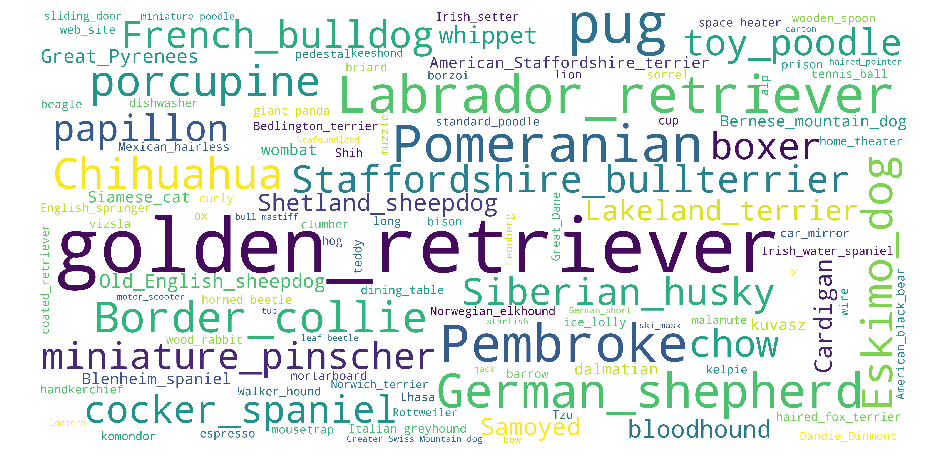

In [49]:
# most common dog breeds
df_copy = twitter_archive_master.copy().dropna()
df_copy['p1'] = df_copy['p1'].astype('str')
title = ' '.join(df_copy['p1'])

#visualizaiton using WordCloud
title_wd = WordCloud(stopwords=STOPWORDS, background_color='white', 
                     height=2000, width=4000).generate(title)
plt.figure(figsize=(16,8))
plt.imshow(title_wd)
plt.axis('off')
plt.show()

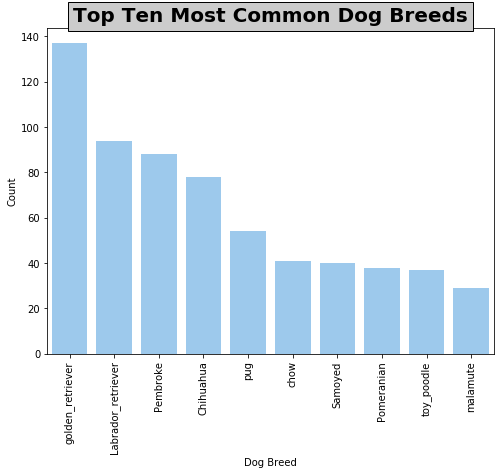

In [50]:
# Top Ten Most Common Dog Breeds bar chart
df_copy = twitter_archive_master.copy()

dog_stage_count = df_copy.p1.value_counts()
dog_stage_indx = dog_stage_count.sort_values(ascending=False)[:10].index
dog_stage_values = dog_stage_count.sort_values(ascending=False)[:10].values


fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = dog_stage_indx, y = dog_stage_values, color='#90caf9', ax=ax)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Top Ten Most Common Dog Breeds', fontweight="bold", fontsize = 20, bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Count')
plt.xlabel('Dog Breed')

del fig,ax,ticks

**The ten (10) most common dog breeds rated are:** <br>
1. Golden Retriever
2. Labrador Retriever
3. Pembroke
4. Chihuahua
5. Pug
6. Chow
7. Samoyed
8. Pomeranian
9. Toy Poodle
10. Malamute

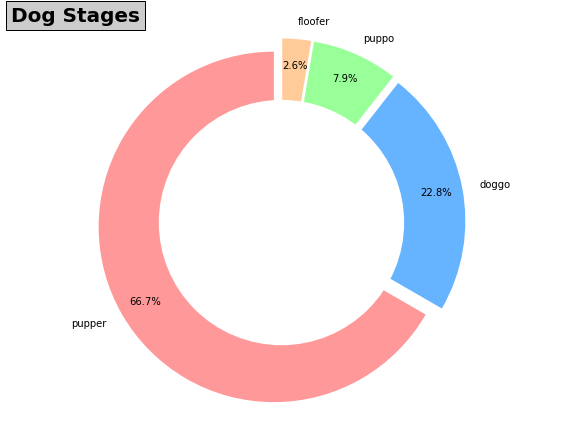

In [51]:
# Pie chart
df_copy = twitter_archive_master.copy().dropna()

dog_stage_count = df_copy.groupby('dog_stage')['dog_stage'].value_counts()[:4]
labels = df_copy[df_copy['dog_stage'] != 'None']['dog_stage'].value_counts()[:4].index
sizes = dog_stage_count.sort_values(ascending=False)[:4].values

# explosion
#explode = (0.1, 0, 0, 0)
explode = (0.05, 0.05, 0.05, 0.05)

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#plt.title('Dog Stages', loc='left', fontweight="bold", fontsize = 20)
plt.title('Dog Stages', loc='left', fontweight="bold", fontsize = 20, bbox={'facecolor':'0.8', 'pad':5})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

The dog stage that had the most tweets was pupper (a dog of smaller size) at 66.7%, followed by: <br>
 - doggo (a dog of medium to large size) at 22.8%
 - puppo (a puppy) at 7.9%
 - floofer (a very fluffy dog) at 2.6%

Text(0.5,1,'Retweeted and Favorited')

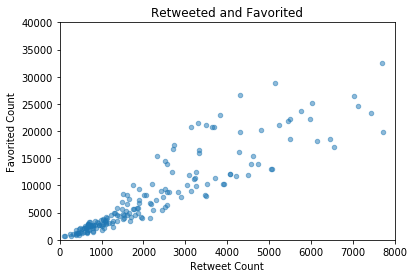

In [53]:
df_copy = twitter_archive_master.copy().dropna()

df_copy.plot(kind = 'scatter', 
             x = 'retweet_count', 
             y = 'favorite_count', 
             alpha = 0.5)

## setting the limits on the x-axis and y-axis
plt.xlim(0,8000)
plt.ylim(0,40000)

plt.xlabel('Retweet Count')
plt.ylabel('Favorited Count')
plt.title('Retweeted and Favorited')

The scatterplot above shows that most of the dogs that were favorited around 5,000 and retweeted was around 1,500.

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0